<h1> HW 2 by nnvusiri</h1>
<h2> Problem 1</h2>

In [1]:
#importing relevant libraries

import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import math,statistics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
#import dataset for training 

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data_features=pd.DataFrame(data.data, columns = data.feature_names)
data_target = (data.target)

In [3]:
data_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data_features.shape

(569, 30)

In [5]:
#converting the data to np array for better performance

data_features2=np.array(data_features)

In [6]:
#function to calculate euclidean distance with the current assigned centroids

def eucd_distance(centroid,traininginstance):
    return np.linalg.norm(traininginstance-centroid)

In [7]:
#function to compute the new clusters with the current assignment of clusters

def averagecentroids(data,clusters,k):
    new_centers=[]
    for i in range(k):
        temp=data[clusters==i].mean(axis=0)
        new_centers.append(temp)
    return np.array(new_centers)

In [8]:
#function to do cluster assignment given the data, centers and number of centers

def clusterassignment(data,centroids,k):
    nrows=data.shape[0]
    clusters=[]
    for point in data:
        distances=[eucd_distance(centroid,point) for centroid in centroids]
        clusters.append(distances.index(min(distances)))
    return np.array(clusters)

In [9]:
#function to run the algorithm with a random inialization from the dataset and assign the clusters till it converges.

def kmeansalgorithm(data,k=5):
    nrows = data.shape[0]
    krand = np.random.choice(nrows,k,replace=False)
    data_centroids = data[krand,:]
    clusters=[-1]*nrows
    i=0
    while(True):
        clusters=clusterassignment(data,data_centroids,k)
        prev_data_centroids=data_centroids
        data_centroids=averagecentroids(data,clusters,k)
        if(np.array_equal(prev_data_centroids,data_centroids)):
            print("Converged at {}th iteration".format(i))
            break
        i+=1
    return clusters

In [10]:
#function for calculating accuracy based on the target information

def accuracy(clusters,targets):
    corrects=(clusters==targets)
    return sum(corrects)/len(corrects)

In [11]:
#run the kmeans algorithm with k-2, I converted the features to np.array for getting better performance.

data_clusters=kmeansalgorithm(data_features2,k=2)

Converged at 6th iteration


In [12]:
accuracy(data_clusters,data_target)

0.8541300527240774

In [13]:
#the whole package of the algorithm to do multiple intializations and check the accuracies with each initialization

def kmeans(data,targets,k,intl=10):
    clusters=[]
    for iter in range(intl):
        current=kmeansalgorithm(data,k)
        clusters.append(current)
        print(accuracy(current,targets))
    return np.array(clusters)    

In [14]:
out=kmeans(data_features2,data_target,k=2,intl=10)

Converged at 5th iteration
0.14586994727592267
Converged at 7th iteration
0.14586994727592267
Converged at 3th iteration
0.8541300527240774
Converged at 2th iteration
0.14586994727592267
Converged at 5th iteration
0.14586994727592267
Converged at 9th iteration
0.8541300527240774
Converged at 5th iteration
0.14586994727592267
Converged at 6th iteration
0.8541300527240774
Converged at 7th iteration
0.14586994727592267
Converged at 6th iteration
0.8541300527240774


We see that accuracy is juggling between 14.5% and 85.5%. Because clusters identified are in reverse order which we don't have control of. Since there are only 2 clusters, sometimes the assignment reverses, and so the accuracies.

<h2> Problem 2 </h2>

In [15]:
#Given f1 function

def f1(x,y):
    return (x-2)**2+(y-3)**2

In [16]:
#partial derivative of f1 w.r.t x
     
def df1dx(x,y):
    return 2*(x-2)

In [17]:
#partial derivative of f1 w.r.t y

def df1dy(x,y):
    return 2*(y-3)

In [18]:
#creating the array for gradf1

def gradf1(x,y):
    return np.array([df1dx(x,y),df1dy(x,y)])

In [19]:
f1(3,4)

2

In [20]:
gradf1(3,4)

array([2, 2])

In [21]:
x=0
y=5
h=0.001

In [22]:
(f1(x,y+h)-f1(x,y-h))/2*h

4.00000000000178e-06

In [23]:
#checking the value for a particular point if matching with taylor's approximation

df1dy(x,y)

4

In [24]:
gradf1(100,80)

array([196, 154])

In [25]:
#function to compute the gradient descent with alpha learning rate and max_iter iterations 
#with stop criteria as <10^-5 for ||tn+1-tn||

def grad_descent(f, gradf, init_t, alpha,max_iter):
    EPS = 1e-5
    prev_t = init_t-10*EPS
    t = init_t.copy()
    
    iter = 0
    while np.linalg.norm(t - prev_t) > EPS and iter < max_iter:
        print (iter,t, f(t[0], t[1]), gradf(t[0], t[1]))
        prev_t = t.copy()
        t -= alpha*gradf(t[0], t[1])
        iter += 1
        
    return t

In [26]:
#computing the gradient descent for the first function with 0,0 as the intitalization 
#and 0.5 as learning rate with maximum iterations as 10

grad_descent(f1, gradf1, np.array([0.0, 0.0]), 0.5,10)

0 [0. 0.] 13.0 [-4. -6.]
1 [2. 3.] 0.0 [0. 0.]


array([2., 3.])

In [27]:
#method for the second function

def r(x,y):
    return ((x+3)-(y-3)**2)

In [28]:
#second function

def f2(x,y):
    return (1-(y-3))**2 + 20*(r(x,y))**2

In [29]:
f2(0.20792481, 1.20893581)

7.790039316551947

In [30]:
#partial derivative w.r.t x for f2

def df2dx(x,y):
    return 40*(r(x,y))

In [31]:
#partial derivative w.r.t y for f2

def df2dy(x,y):
    return (2*y-8)-80*(y-3)*(r(x,y))

In [32]:
#grad function for f2

def gradf2(x,y):
    return np.array([df2dx(x,y),df2dy(x,y)])

In [33]:
#second derivative for f2 w.r.t x

def df2dx2(x,y):
    return 40

In [34]:
#second derivative for f2 w.r.t y

def df2dy2(x,y):
    return 2-80*(r(x,y)-2*(y-3)**2)

In [35]:
#second derivative for f2 w.r.t y

def df2dxdy(x,y):
    return -80*(y-3)

In [36]:
#computing hessian matrix for the newton's method

def hinv(x,y):
    a=df2dx2(x,y)
    b=df2dxdy(x,y)
    c=df2dxdy(x,y)
    d=df2dy2(x,y)
    factor = 1/((a*d)-(b*c))
    matrix =np.array([[d,-1*b],[-1*c,a]])
    return factor*matrix

In [37]:
np.matmul(hinv(2,4),[1,2])

array([-0.00015723, -0.01257862])

In [38]:
def newtons_method(f,gradf,hinv,init_t, max_iter):
    EPS = 1e-4
    prev_t = init_t-10*EPS
    t = init_t.copy()
    
    iter = 0
    while np.linalg.norm(t - prev_t) > EPS and iter < max_iter:
        print (iter,t,f(t[0], t[1]))
        #print(hinv(t[0],t[1]))
        prev_t = t.copy()
        t -= np.matmul(hinv(t[0],t[1]),gradf(t[0], t[1]))
        #print (iter,t,f(t[0], t[1]))
        iter += 1
        
    return t

In [39]:
opt=newtons_method(f2, gradf2,hinv,np.array([0.0,0.0]),100)

0 [0. 0.] 736.0
1 [5.90041494 0.01659751] 15.867496912118456
2 [-17.60844601   3.95658491] 4819.583362465591
3 [-2.08481176  3.95665471] 0.0018788137904998895
4 [-2.00187883  3.99999999] 7.05987701445199e-05
5 [-2.  4.] 3.4875434835545694e-19


In [40]:
f2(opt[0],opt[1])

0.0

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline  

from numpy import *
from numpy.linalg import norm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *
from numpy import *

x = arange(-10, 10, 0.1)
y = arange(-5,10, 0.1)
X, Y = meshgrid(x, y)
zs = np.array([f2(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
#R=((X+3)-(Y-3)**2)
#Z=(1-(Y-3))**2 + 20*((R)**2)

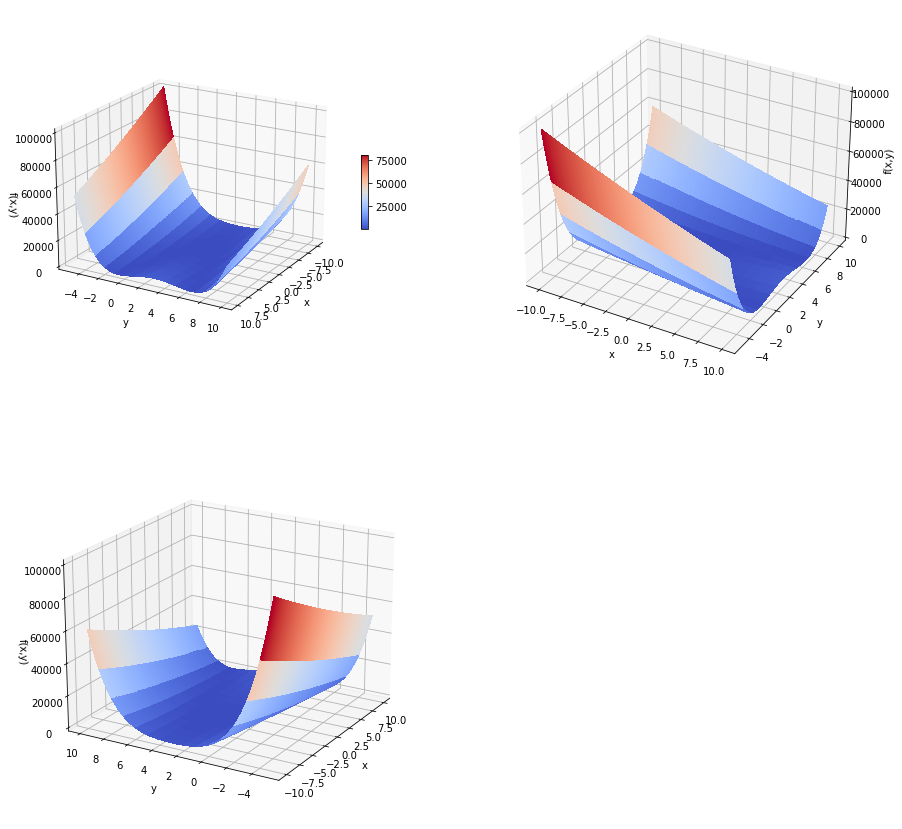

In [42]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(221, projection='3d')
p1=ax.plot_surface(X, Y, Z,cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.view_init(20, 30)

fig.colorbar(p1, shrink=0.2, aspect=10)

ax = fig.add_subplot(222, projection='3d')
ax.plot_surface(X, Y, Z,cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)



ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

ax = fig.add_subplot(223, projection='3d')
ax.plot_surface(X, Y, Z,cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)



ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.view_init(20, -150)

plt.show()

In [43]:
np.unravel_index(np.argmin(Z, axis=None), Z.shape)

(90, 80)

In [44]:
X[39,2]

-9.8

In [45]:
Y[39,2]

-1.1000000000000139

In [46]:
f2(-1.7999999999999998,1.9000000000000035)

4.411999999999982

<h2> Problem 3 </h2>

I'm taking an approach of character vectorization. <br>
I solved the problem in 2 ways:
<br>First:
<li> First, I vectorized alphabets of each name and maintain counts of each letter. I'm each letter is uniformly distributed and independant from each other within each class (naive bayes).
<li> I built the model from scratch by computing priors likelihoods using the counts of the letters and computed the posteriors within each class. Chosen the class with better probability as the final class. 
<li> Validated the output on the same feature set the in-built packages.
<br>Second:
<li> I have used count vectorization with sizes of (2,2) ngram and ran the in-built function using test train split. The idea was to get better accuracy than the previous model. The predictions are made accordingly. 

In [47]:
import pandas as pd

In [48]:
boysdata=pd.read_csv("boy_names.csv")

In [49]:
girlsdata=pd.read_csv("girl_names-2.csv")

In [50]:
girlsdata

,Unnamed: 0,x
0,1,Elaina
1,2,Deedee
2,3,Aaliyah
3,4,Kathey
4,5,Antonetta
...,...,...
995,996,Terese
996,997,Tatyanna
997,998,Chana
998,999,Bree


In [51]:
boysdata["class"]=-1
girlsdata["class"]=1

In [52]:
data=pd.concat([boysdata.loc[:,["x","class"]],girlsdata.loc[:,["x","class"]]],axis=0)
data=data.reset_index()
data=data.drop(columns=["index"],axis=1)
data=data.rename(columns={"x": "name"})
data.head()

,name,class
0,Otho,-1
1,Caswell,-1
2,Deforest,-1
3,Eddy,-1
4,Corbett,-1


In [53]:
letters=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [54]:
data["name2"]=data["name"].str.lower()

In [55]:
data.head()

,name,class,name2
0,Otho,-1,otho
1,Caswell,-1,caswell
2,Deforest,-1,deforest
3,Eddy,-1,eddy
4,Corbett,-1,corbett


In [56]:
names=pd.DataFrame(index=data["name2"],columns=letters)

In [57]:
zero_data = np.zeros(shape=((data.shape[0]),26))
d = pd.DataFrame(zero_data,index=data["name2"],columns=letters)

In [58]:
d.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
name2,,,,,,,,,,,,,,,,,,,,,
otho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
caswell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
deforest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eddy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
corbett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
for i in range(d.shape[0]):
    wordlist=list(d.index[i])
    for j in wordlist:
        d.loc[d.index[i],j]+=1

In [60]:
d.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
name2,,,,,,,,,,,,,,,,,,,,,
otho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
caswell,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
deforest,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
eddy,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
corbett,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
d["classes"]=data.loc[:,"class"].values

In [62]:
d.head()

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,classes
name2,,,,,,,,,,,,,,,,,,,,,
otho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
caswell,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1
deforest,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
eddy,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1
corbett,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [63]:
dboy=d.loc[d["classes"]==-1]
dboy=dboy.drop(columns="classes")
dgirl=d.loc[d["classes"]==1]
dgirl=dgirl.drop(columns="classes")

In [64]:
count_boy=dboy.shape[0]
count_girl=dgirl.shape[0]
print(count_boy)
print(count_girl)

1000
1000


In [65]:
#Calculating priors for boy class and girl class

prior_boy=count_boy/(count_boy+count_girl)
prior_girl=count_girl/(count_boy+count_girl)

In [66]:
totals_boy=dboy.sum(axis = 0, skipna = True)
totals_girl=dgirl.sum(axis=0,skipna=True)
totalfeatures_boy=sum(totals_boy)
totalfeatures_girl=sum(totals_girl)

In [67]:
#Calculating likelihoods of each boy and girl names

likelihoods_boy=totals_boy/totalfeatures_boy
likelihoods_girl=totals_girl/totalfeatures_girl

In [68]:
likelihoods_boy["a"]

0.10857931986880719

In [69]:
test_data=pd.read_csv("test_names.csv")

In [70]:
test_data

,Unnamed: 0,x
0,1,Brittani
1,2,Brandin
2,3,Darry
3,4,Tresa
4,5,Fabiola
...,...,...
95,96,Migdalia
96,97,Abril
97,98,Aliyah
98,99,Tianna


In [71]:
test_data=test_data.drop(columns="Unnamed: 0")

In [72]:
zero_data = np.zeros(shape=((test_data.shape[0]),26))
dt = pd.DataFrame(zero_data,index=test_data.loc[:,"x"].str.lower(),columns=letters)

In [73]:
#calculating the counts of each alphabet for each name in the test data

for i in range(dt.shape[0]):
    wordlist=list(dt.index[i])
    #print(wordlist)
    for j in wordlist:
        dt.loc[dt.index[i],j]+=1

In [74]:
#calculating probabilities for each class for the test names using the likelihoods and priors.

prob_boy=[]
prob_girl=[]

for i in dt.index:
    val_boy=1
    val_girl=1
    for j in letters:
        val_boy*=prior_boy*pow(likelihoods_boy[j],dt.loc[i,j])
        val_girl*=prior_girl*pow(likelihoods_girl[j],dt.loc[i,j])
    prob_boy.append(val_boy)
    prob_girl.append(val_girl)

In [75]:
#Assigning classes based on the probabilities

dt["p_b"]=prob_boy
dt["p_g"]=prob_girl

dt["pred_class"]=-1

dt.loc[dt["p_b"]<dt["p_g"],"pred_class"]=1

In [76]:
dt.head()

,a,b,c,d,e,f,g,h,i,j,...,t,u,v,w,x,y,z,p_b,p_g,pred_class
x,,,,,,,,,,,,,,,,,,,,,
brittani,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.759886e-18,3.429273e-18,1
brandin,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.001700e-17,4.621178e-17,-1
darry,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.800249e-14,1.086617e-14,-1
tresa,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.233434e-14,4.084364e-14,1
fabiola,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.229726e-18,6.000727e-18,-1


In [77]:
predicted_girls_names=dt.loc[dt["pred_class"]==1].index
print(predicted_girls_names)

Index(['brittani', 'tresa', 'earnestine', 'hallie', 'lani', 'skyla', 'charlie',
       'mariann', 'kenzie', 'lee', 'estefany', 'alwilda', 'stephania',
       'graciela', 'art', 'aretha', 'kaden', 'nasir', 'chase', 'vlasta',
       'gael', 'stephenie', 'helena', 'letty', 'cherelle', 'allyssa', 'cindy',
       'rickie', 'stacie', 'zaria', 'nile', 'shaquana', 'lahoma', 'lala',
       'enid', 'jase', 'brittany', 'tiesha', 'lulah', 'geralyn', 'desean',
       'vinie', 'rosaline', 'destin', 'shyheim', 'reginal', 'latoya', 'nell',
       'neha', 'chip', 'nettie', 'trina', 'saige', 'asha', 'migdalia', 'abril',
       'aliyah', 'tianna'],
      dtype='object', name='x')


In [78]:
predicted_boys_names=dt.loc[dt["pred_class"]==-1].index
print(predicted_boys_names)

Index(['brandin', 'darry', 'fabiola', 'wirt', 'evette', 'thurston',
       'lindbergh', 'cornel', 'burdette', 'renard', 'joella', 'glen', 'grove',
       'foster', 'maury', 'bynum', 'ruie', 'jerry', 'che', 'birt', 'afton',
       'izora', 'kiefer', 'debora', 'oney', 'toriano', 'roseanne', 'teddie',
       'dwyane', 'boyce', 'bose', 'gino', 'reid', 'dock', 'rolf', 'lonnie',
       'cullen', 'kerry', 'garrick', 'alston', 'jarred', 'colie'],
      dtype='object', name='x')


In [79]:
#writing the output of test data

output_girls = pd.DataFrame(predicted_girls_names)
output_girls["gender"]="girl"
output_girls

output_boys = pd.DataFrame(predicted_boys_names)
output_boys["gender"]="boy"
output_boys

output=output_boys.append(output_girls)
print(output.shape)
output.to_csv("first_model.csv",index=False)

(100, 2)


<h4>Using Libraries with this approach of features generation to test my model output.</h4>

In [80]:
itrain, itest = train_test_split(range(d.shape[0]), train_size=0.7)
mask=np.ones(d.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [81]:
X=d.loc[:,letters]
y=d["classes"]

In [82]:
Xtrainthis=X[mask]
Ytrainthis=y[mask]
Xtestthis=X[~mask]
Ytestthis=y[~mask]
clf = MultinomialNB(alpha = 1)
clf.fit(Xtrainthis, Ytrainthis)
training_accuracy = clf.score(Xtrainthis,Ytrainthis)
test_accuracy = clf.score(Xtestthis,Ytestthis)
        
print(training_accuracy)
print(test_accuracy)

0.6578571428571428
0.655


In [83]:
x_test=dt.loc[:,letters]
x_test.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
x,,,,,,,,,,,,,,,,,,,,,
brittani,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
brandin,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
darry,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
tresa,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
fabiola,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
pred=clf.predict(x_test)

In [85]:
lib_pred_boy=[]
lib_pred_girl=[]
iter=0
for i in pred:
    if(i==1):
        lib_pred_girl.append(x_test.index[iter])
    else:
        lib_pred_boy.append(x_test.index[iter])
    iter+=1

In [86]:
np.array(lib_pred_girl)

array(['brittani', 'tresa', 'earnestine', 'hallie', 'lani', 'evette',
       'skyla', 'charlie', 'mariann', 'kenzie', 'lee', 'estefany',
       'stephania', 'graciela', 'art', 'aretha', 'kaden', 'nasir',
       'chase', 'vlasta', 'gael', 'stephenie', 'helena', 'letty',
       'allyssa', 'cindy', 'rickie', 'stacie', 'zaria', 'nile',
       'shaquana', 'lahoma', 'lala', 'enid', 'jase', 'brittany', 'tiesha',
       'desean', 'vinie', 'rosaline', 'destin', 'shyheim', 'reginal',
       'latoya', 'nell', 'neha', 'nettie', 'trina', 'saige', 'asha',
       'migdalia', 'abril', 'aliyah', 'tianna'], dtype='<U10')

In [87]:
np.array(lib_pred_boy)

array(['brandin', 'darry', 'fabiola', 'wirt', 'thurston', 'lindbergh',
       'cornel', 'burdette', 'renard', 'joella', 'alwilda', 'glen',
       'grove', 'foster', 'maury', 'bynum', 'ruie', 'jerry', 'che',
       'birt', 'afton', 'cherelle', 'izora', 'kiefer', 'debora', 'oney',
       'toriano', 'roseanne', 'teddie', 'dwyane', 'boyce', 'bose', 'gino',
       'lulah', 'geralyn', 'reid', 'dock', 'rolf', 'lonnie', 'cullen',
       'chip', 'kerry', 'garrick', 'alston', 'jarred', 'colie'],
      dtype='<U9')

<h2>Using libraries and 2,2 gram vectorizer</h2>

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 3))
X = char_vectorizer.fit_transform(data.loc[:,"name"])
X = X.tocsc()
y=data["class"]

In [89]:
print(X)

  (460, 0)	1
  (264, 1)	1
  (1002, 1)	1
  (991, 2)	1
  (405, 3)	1
  (542, 3)	1
  (138, 4)	1
  (432, 4)	1
  (912, 4)	1
  (1226, 4)	1
  (1771, 4)	1
  (1960, 4)	1
  (1701, 5)	1
  (141, 6)	1
  (51, 7)	1
  (192, 7)	1
  (476, 7)	1
  (1012, 7)	1
  (1121, 8)	1
  (359, 9)	1
  (873, 9)	1
  (1525, 9)	1
  (1859, 9)	1
  (1900, 9)	1
  (1987, 9)	1
  :	:
  (1076, 1936)	1
  (1167, 1936)	1
  (691, 1937)	1
  (314, 1938)	1
  (273, 1939)	1
  (598, 1939)	1
  (886, 1939)	1
  (1093, 1939)	1
  (1752, 1939)	1
  (465, 1940)	1
  (685, 1941)	1
  (1837, 1942)	1
  (707, 1943)	1
  (1116, 1943)	1
  (404, 1944)	1
  (47, 1945)	1
  (444, 1945)	1
  (1980, 1946)	1
  (1710, 1947)	1
  (1279, 1948)	1
  (1360, 1949)	1
  (1602, 1949)	1
  (1982, 1950)	1
  (1517, 1951)	1
  (1188, 1952)	1


In [90]:
itrain, itest = train_test_split(range(data.shape[0]), train_size=0.7)
mask=np.ones(data.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [91]:
Xtrainthis=X[mask]
Ytrainthis=y[mask]
Xtestthis=X[~mask]
Ytestthis=y[~mask]
clf = MultinomialNB(alpha = 1)
clf.fit(Xtrainthis, Ytrainthis)
training_accuracy = clf.score(Xtrainthis,Ytrainthis)
test_accuracy = clf.score(Xtestthis,Ytestthis)
        
print(training_accuracy)
print(test_accuracy)

0.8885714285714286
0.6966666666666667


In [92]:
def lookup(x):
    str(x)
    new = char_vectorizer.transform([x])
    y_pred = clf.predict(new)
    if (y_pred == 1):
        return 1
    else:
        return -1

In [93]:
test_data=pd.read_csv("test_names.csv")
test_data=test_data.loc[:,["x"]]
genders=[]
for i in range(test_data.shape[0]):
    genders.append(lookup(test_data.loc[i,"x"]))
    

In [94]:
test_data["genders"]=genders

In [95]:
test_data

,x,genders
0,Brittani,1
1,Brandin,-1
2,Darry,-1
3,Tresa,-1
4,Fabiola,1
...,...,...
95,Migdalia,1
96,Abril,1
97,Aliyah,1
98,Tianna,1


In [96]:
pred_boys=test_data.loc[test_data["genders"]==-1,"x"]
pred_girls=test_data.loc[test_data["genders"]==1,"x"]

In [97]:
np.array(pred_girls)

array(['Brittani', 'Fabiola', 'Wirt', 'Hallie', 'Lani', 'Evette',
       'Lindbergh', 'Skyla', 'Charlie', 'Burdette', 'Mariann', 'Lee',
       'Joella', 'Estefany', 'Alwilda', 'Stephania', 'Glen', 'Graciela',
       'Nasir', 'Chase', 'Vlasta', 'Che', 'Stephenie', 'Helena', 'Birt',
       'Letty', 'Cherelle', 'Izora', 'Allyssa', 'Cindy', 'Stacie',
       'Zaria', 'Toriano', 'Roseanne', 'Nile', 'Shaquana', 'Dwyane',
       'Lahoma', 'Boyce', 'Lala', 'Enid', 'Jase', 'Brittany', 'Tiesha',
       'Gino', 'Lulah', 'Geralyn', 'Desean', 'Rosaline', 'Destin', 'Reid',
       'Shyheim', 'Reginal', 'Nell', 'Lonnie', 'Cullen', 'Nettie',
       'Trina', 'Asha', 'Migdalia', 'Abril', 'Aliyah', 'Tianna', 'Colie'],
      dtype=object)

In [98]:
np.array(pred_boys)

array(['Brandin', 'Darry', 'Tresa', 'Earnestine', 'Thurston', 'Cornel',
       'Renard', 'Kenzie', 'Grove', 'Foster', 'Art', 'Aretha', 'Maury',
       'Bynum', 'Kaden', 'Ruie', 'Jerry', 'Gael', 'Afton', 'Kiefer',
       'Debora', 'Rickie', 'Oney', 'Teddie', 'Bose', 'Vinie', 'Dock',
       'Rolf', 'Latoya', 'Neha', 'Chip', 'Kerry', 'Garrick', 'Saige',
       'Alston', 'Jarred'], dtype=object)

In [99]:
output_girls = pd.DataFrame(pred_girls)
output_girls["gender"]="girl"
output_girls

output_boys = pd.DataFrame(pred_boys)
output_boys["gender"]="boy"
output_boys

output=output_boys.append(output_girls)
output.shape
output.to_csv("second_model.csv",index=False)

<h3> Question 4 </h3>

<b>a) Can you describe scenarios when the above equality doesn't hold? Give an example when the left side
is bigger than the right side? Give another example when the right side is bigger than the left side?</b>
$$
P(X=x|Y=y) = \prod_{\alpha}P(x_{\alpha}|y)
$$
<b>Ans:</b> The equality doesn't hold when conditional independance between the features fail. That means, 
$y$ doesn't make $x_{\alpha}$ independant $\forall \alpha \in D$. 

Let's look at an example where left > right:

Say $X_1, X_2, X_3$ denote the outcome of 3 coin flips.
$X_i \in \{H,T\} \forall i \in {1,2,3}$ 

Let $y$ be a random variable, counting the number of heads of the 3 coin flips. This gives, 
$$y \in \{0,1,2,3\}$$

Now we know that $X_1, X_2, X_3$ are independent to each other. If, I put a condition on y, that will make them dependant. 
Let's compute the below:
$$ P(X_1=H, X_2=H,X_3=T|y=2)$$

We know for 3 coin flips, possible outcomes are 
$$HHH$$
$$HHT$$
$$HTH$$
$$THH$$
$$HTT$$
$$THT$$
$$TTH$$
$$TTT$$

Out of these, y=2 implies the outcome is one of $\{HHT, HTH,THH\}$

So, $ P(X_1=H, X_2=H,X_3=T|y=2) = 1/3 $

Now, for right side of the equation, $$\prod_{\alpha}P(x_{\alpha}|y=2) = P(X1=H|y=2)*P(X2=H|y=2)*P(X3=T|y=2)$$ 
$$= 2/3*2/3*1/3 = 4/27 < 1/3 \textrm{ (Left value) } $$

Now, let me give an example where right > left:

Take the sceanrio of  $ P(X_1=H, X_2=H,X_3=T|y=1)$

 $y=1$ implies the outcome is one of $\{HTT, TTH,THT\}$
 
 So, $ P(X_1=H, X_2=H,X_3=T|y=1) = 0 $

But, $$\prod_{\alpha}P(x_{\alpha}|y=1) = P(X1=H|y=1)*P(X2=H|y=1)*P(X3=T|y=1)$$ 
$$1/3*1/3*2/3=2/27 > 0 \textrm{ (right side) }$$


<b> b) Now consider a different model, which we will call the "full" model, in which all the features are fully
dependent (i.e., we make no factorization assumptions). How might we represent $p(x|y = c)$ in this
case? How many parameters are needed to represent $p(x|y = c)$?</b>

The Full model can be represented like a fully joint distribution with condtional factor. It will be like below.
$$
P(X=(x_1,x_2...x_d)|y=c) = \\P(X_1=x_1|X_2=x_2,X_3=x_3,...X_d=x_d,y=c) \times\\
                           P(X_2=x_2|X_3=x_3,...X_d=x_d,y=c)\times\\
                           .\\
                           .\\
                           P(X_d=x_d|y=c) 
$$


We have the number of parameters within each class as = $2^{d-1}+2^{d-2}+....+2+1 = 2^{d+1}-1 = O(2^d)$
For $c$ classes, the same would be $c(O(2^d))$



<br>
<b>
c) Assume the number of features D is fixed. Let there be N training cases. If the sample size N is very
small, which model (naive Bayes or full) is likely to give lower test set error, and why?
</b>

For small $N$, naive bayes would perform better on test set as it doesn't build strong relationships with data unlike full model. So full model might overfit for small $N$ and Naive bayes will outperform full model. 

References:
<br>
https://www.cs.toronto.edu/~guerzhoy/411/lec/W02/python/graddescent2d.html
<br>
https://www.kaggle.com/springboardroger/naive-bayes-name-gender-classifier